In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
import plotly.graph_objects as go

In [17]:
mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Kyoto/Kyotostation.npy'
twitter_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/npy/Kyotostation_3zi_2022.npy'
outlier_twitter_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Kyoto/npy/outlier/Kyotostation_3zi_2022.npy'

mobile = np.load(mobile_PATH)
twitter = np.load(outlier_twitter_PATH)
mobile_flatten = mobile.flatten()
twitter_flatten = twitter.flatten()
prob_flatten = twitter_flatten / mobile_flatten
prob = prob_flatten.reshape([365, 24])
prob_parhour = np.sum(prob, axis=0)
prob_parday = np.sum(prob, axis=1)

In [18]:
day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
x_label_year = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0,24):
            hour = str(hour)
            key = int('22'+ month + day + hour)
            key = str(key)
            x_label_year.append(key)
            
x_label_day = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
            key = int('22'+ month + day)
            key = str(key)
            x_label_day.append(key)

x_label_hour = []
for hour in range(0,24):
    hour = str(hour)
    x_label_hour.append(hour)

x_label_days =['Sun',
          'Mon',
          'Tue',
          'Wed',
          'Thu',
          'Fri',
          'Sat']
    

In [19]:
mobile = np.load(mobile_PATH)
twitter = np.load(outlier_twitter_PATH)

list_mobile_Sun = []
list_mobile_Mon = []
list_mobile_Tue = []
list_mobile_Wed = []
list_mobile_Thu = []
list_mobile_Fri = []
list_mobile_Sat = []

list_twitter_Sun = []
list_twitter_Mon = []
list_twitter_Tue = []
list_twitter_Wed = []
list_twitter_Thu = []
list_twitter_Fri = []
list_twitter_Sat = []
for i in range(0,365):
    if i%7 == 6:
        list_mobile_Fri.append(mobile[i].tolist())
        list_twitter_Fri.append(twitter[i].tolist())
    if i%7 == 0:
        list_mobile_Sat.append(mobile[i].tolist())
        list_twitter_Sat.append(twitter[i].tolist())
    if i%7 == 1:
        list_mobile_Sun.append(mobile[i].tolist())
        list_twitter_Sun.append(twitter[i].tolist())
    if i%7 == 2:
        list_mobile_Mon.append(mobile[i].tolist())
        list_twitter_Mon.append(twitter[i].tolist())
    if i%7 == 3:
        list_mobile_Tue.append(mobile[i].tolist())
        list_twitter_Tue.append(twitter[i].tolist())
    if i%7 == 4:
        list_mobile_Wed.append(mobile[i].tolist())
        list_twitter_Wed.append(twitter[i].tolist())
    if i%7 == 5:
        list_mobile_Thu.append(mobile[i].tolist())
        list_twitter_Thu.append(twitter[i].tolist())
        

list_twitter_Sun = np.array(list_twitter_Sun)
list_twitter_Mon = np.array(list_twitter_Mon)
list_twitter_Tue = np.array(list_twitter_Tue)
list_twitter_Wed = np.array(list_twitter_Wed)
list_twitter_Thu = np.array(list_twitter_Thu)
list_twitter_Fri = np.array(list_twitter_Fri)
list_twitter_Sat = np.array(list_twitter_Sat)

list_mobile_Sun = np.array(list_mobile_Sun)
list_mobile_Mon = np.array(list_mobile_Mon)
list_mobile_Tue = np.array(list_mobile_Tue)
list_mobile_Wed = np.array(list_mobile_Wed)
list_mobile_Thu = np.array(list_mobile_Thu)
list_mobile_Fri = np.array(list_mobile_Fri)
list_mobile_Sat = np.array(list_mobile_Sat)

list_prob_Sun = list_twitter_Sun / list_mobile_Sun
list_prob_Mon = list_twitter_Mon / list_mobile_Mon
list_prob_Tue = list_twitter_Tue / list_mobile_Tue
list_prob_Wed = list_twitter_Wed / list_mobile_Wed
list_prob_Thu = list_twitter_Thu / list_mobile_Thu
list_prob_Fri = list_twitter_Fri / list_mobile_Fri
list_prob_Sat = list_twitter_Sat / list_mobile_Sat

prob_perdays = [np.average(list_prob_Sun),
                     np.average(list_prob_Mon),
                     np.average(list_prob_Tue),
                     np.average(list_prob_Wed),
                     np.average(list_prob_Tue),
                     np.average(list_prob_Fri),
                     np.average(list_prob_Sat)]


In [20]:
fig = go.Figure(data=[
    go.Scatter(x=x_label_year, y=prob_flatten, name='prob'),
])
fig.update_layout(xaxis=dict(title='prob'),
                 yaxis=dict(title='Time'),
                 title='prob year')
fig.show()

In [21]:
fig = go.Figure(data=[
    go.Scatter(x=x_label_day, y=prob_parday, name='prob'),
])
fig.update_layout(xaxis=dict(title='Time'),
                 yaxis=dict(title='prob'),
                 title='prob day')
fig.show()
fig = go.Figure(data=[
    go.Scatter(x=x_label_hour, y=prob_parhour, name='prob'),
])
fig.update_layout(xaxis=dict(title='hour'),
                 yaxis=dict(title='prob'),
                 title='prob hour')
fig.show()
fig = go.Figure(data=[
    go.Scatter(x=x_label_days, y=prob_perdays, name='prob'),
])
fig.update_layout(xaxis=dict(title='days'),
                 yaxis=dict(title='prob'),
                 title='prob days')
fig.show()

## 休日と平日

In [22]:
mobile = np.load(mobile_PATH)
twitter = np.load(outlier_twitter_PATH)
list_mobile_holiday = []
list_mobile_workday = []

list_twitter_holiday = []
list_twitter_workday = []

for i in range(0,365):
    if i%7 == 0:
        list_mobile_holiday.append(mobile[i].tolist())
        list_twitter_holiday.append(twitter[i].tolist())
    if i%7 == 1:
        list_mobile_holiday.append(mobile[i].tolist())
        list_twitter_holiday.append(twitter[i].tolist())
    if i%7 == 2:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 3:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 4:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 5:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 6:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
        

list_mobile_holiday = np.array(list_mobile_holiday)
list_mobile_workday = np.array(list_mobile_workday)

list_twitter_holiday = np.array(list_twitter_holiday)
list_twitter_workday = np.array(list_twitter_workday)

list_mobile_holiday = list_mobile_holiday.flatten()
list_mobile_workday = list_mobile_workday.flatten()
list_twitter_holiday = list_twitter_holiday.flatten()
list_twitter_workday = list_twitter_workday.flatten()

In [23]:
prob_workday = list_twitter_workday / list_mobile_workday
prob_holiday = list_twitter_holiday / list_mobile_holiday

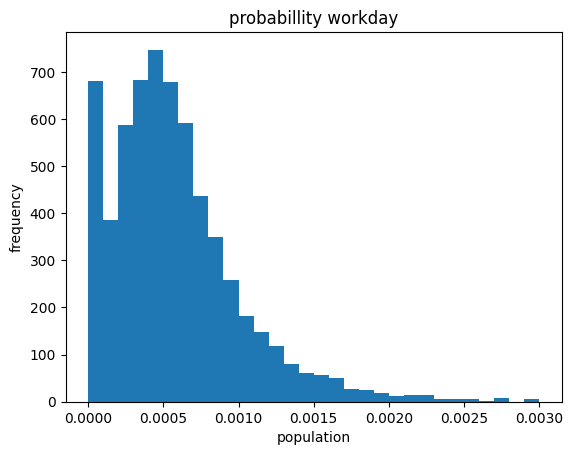

In [24]:
plt.hist(prob_workday, range=(0,0.003), bins=30)
plt.title('probabillity workday')
plt.xlabel('population')
plt.ylabel('frequency')
plt.show()

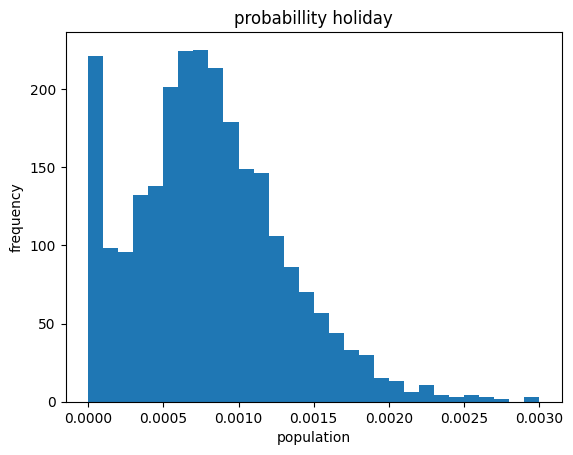

In [25]:
plt.hist(prob_holiday, range=(0,0.003), bins=30)
plt.title('probabillity holiday')
plt.xlabel('population')
plt.ylabel('frequency')
plt.show()

In [26]:
np.average(prob_workday)

0.0005806112165379114

In [27]:
np.average(prob_holiday)

0.0008136039568999853